In [1]:
from src.spinbox.core import *
import matplotlib.pyplot as plt
import numpy as np

In [6]:
A = 1
isospin = False

sig_x = pauli(2)

ket = ProductState(A, isospin=isospin).randomize()
phaser = ProductOperator(A, isospin=isospin)

t = 0.01

print("BEFORE\n", ket)
print("norm = ", ket.dagger() * ket)

phaser = phaser.apply_onebody_operator(0, expm(1j * t * sig_x))
ket_rotated = phaser * ket

print("AFTER\n", ket_rotated)
print("norm = ", ket_rotated.dagger() * ket_rotated)

BEFORE
 ProductState ket of 1 particles: 
ket #0:
[[ 0.02268861+0.44279046j]
 [-0.76468762-0.46762665j]]

norm =  (1+0j)
AFTER
 ProductState ket of 1 particles: 
ket #0:
[[ 0.01825965+0.4429952j ]
 [-0.76932557-0.45995652j]]

norm =  (1+0j)


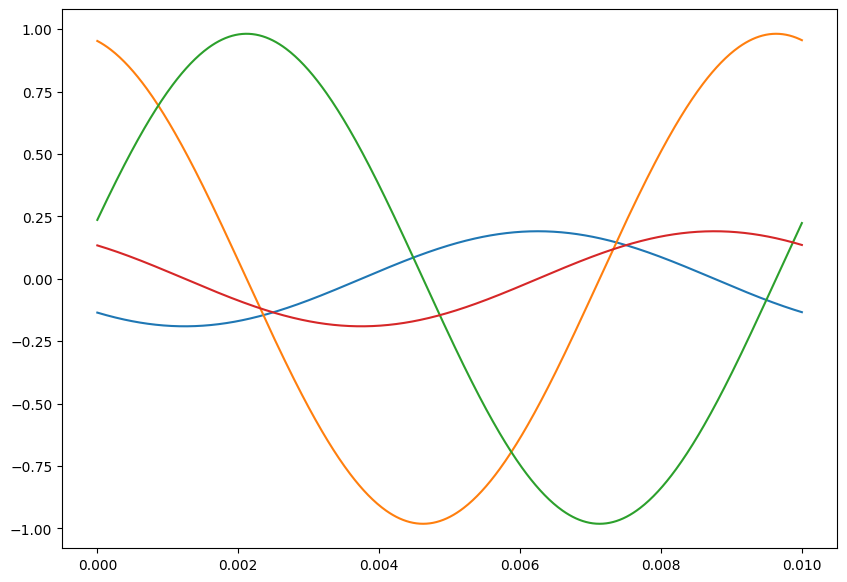

In [28]:
dt = 0.01
n_points = int(2*np.pi/dt)
domain = np.linspace(0, dt, n_points)
ket = ProductState(A, isospin=isospin).randomize()


sigma = pauli('list')
phaser = ProductOperator(A, isospin=isospin)
phaser = phaser.apply_onebody_operator(0, expm(dt * 1j * sigma[0]))

c_list = []
for _ in range(n_points):
    ket = phaser * ket
    c_real = np.real(ket.coefficients[0]).flatten()
    c_imag = np.imag(ket.coefficients[0]).flatten()
    c = np.concatenate([c_real, c_imag])
    c_list.append(c)

plt.figure(figsize=(10,7))
plt.plot(domain, c_list)
